In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import wandb
from wandb.integration.xgboost import WandbCallback

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
warnings.filterwarnings('ignore')

d:\Users\500ny\anaconda3\envs\hanlyang0522\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.0.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
class cfg:
    data_path = './data'
    df_path = os.path.join(data_path, 'acc_and_injury_df.pickle')

In [3]:
wandb.init(
    project="Hyundai AI"
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hanlyang. Use `wandb login --relogin` to force relogin


<font color=yellow>
1. data 불러오기
</font>

In [4]:
df_anj = pd.read_pickle(cfg.df_path)
df_anj

,ALIGNMNT,BODYTYPE,CLIMATE,CURBWGT,DVLAT,DVLONG,IMPACTSP,PREEVENT,PREILOC,PREISTAB,PREMOVE,PROFILE,RELINTER,ROLLOVER,SURTYPE,TOWHITCH,VEHTYPE,MODELYR,VEHNO,HMC_CASE_ID,HMC_CASE_ID_VEHNO,MANCOLL,TIME,EVENTS,FIRE,GAD1,PDOF1,PDOF2,ORIGAVTW,OPENLF,OPENLR,OPENRF,OPENRR,OPENTG,OBJCONT,SEATPOS_NEW,AIS
0,1.0,1.0,999.0,161.0,12.0,20.0,998.0,1.0,4.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2,1992.0,1.0,2005-2-1,2005-2-1-1,0.0,925.0,1.0,0.0,3.0,11.0,999.0,3.0,3.0,0.0,1.0,0.0,0.0,3.0,1.0,2
1,2.0,1.0,999.0,143.0,999.0,999.0,999.0,4.0,1.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,2,1989.0,2.0,2005-2-2,2005-2-2-2,4.0,1353.0,1.0,0.0,3.0,12.0,999.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,1
2,1.0,1.0,999.0,161.0,999.0,999.0,999.0,4.0,1.0,999.0,1.0,1.0,0.0,0.0,1.0,0.0,2,2001.0,1.0,2005-2-3,2005-2-3-1,2.0,1111.0,2.0,0.0,2.0,12.0,999.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,2
3,2.0,1.0,999.0,120.0,0.0,20.0,998.0,3.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,2,2003.0,2.0,2005-2-4,2005-2-4-2,1.0,1248.0,2.0,0.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
4,3.0,2.0,999.0,146.0,0.0,22.0,998.0,2.0,4.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,3,2004.0,1.0,2005-2-5,2005-2-5-1,0.0,1539.0,3.0,0.0,2.0,1.0,999.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55141,3.0,8.0,9.0,0.0,999.0,999.0,999.0,6.0,4.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,999,2018.0,1.0,2020-66-20444,2020-66-20444-1,0.0,1638.0,2.0,0.0,2.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1
55142,1.0,8.0,8.0,0.0,999.0,999.0,999.0,2.0,4.0,999.0,3.0,1.0,0.0,1.0,1.0,0.0,999,2002.0,1.0,2020-20-20460,2020-20-20460-1,0.0,2154.0,1.0,0.0,5.0,998.0,998.0,1.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,1
55143,1.0,8.0,8.0,544.0,999.0,999.0,999.0,3.0,1.0,1.0,1.0,999.0,0.0,1.0,1.0,1.0,999,2005.0,1.0,2020-21-20474,2020-21-20474-1,1.0,640.0,5.0,0.0,5.0,998.0,998.0,7.0,999.0,999.0,999.0,999.0,0.0,3.0,1.0,1
55144,1.0,8.0,8.0,544.0,999.0,999.0,999.0,3.0,1.0,1.0,1.0,999.0,0.0,1.0,1.0,1.0,999,2005.0,1.0,2020-21-20474,2020-21-20474-1,1.0,640.0,5.0,0.0,5.0,998.0,998.0,7.0,999.0,999.0,999.0,999.0,0.0,3.0,2.0,2


<font color=yellow>
2. 전처리 및 데이터 확인
</font>

In [5]:
# 누락된 값 출력
df_anj[df_anj.isna().any(axis=1)]

,ALIGNMNT,BODYTYPE,CLIMATE,CURBWGT,DVLAT,DVLONG,IMPACTSP,PREEVENT,PREILOC,PREISTAB,PREMOVE,PROFILE,RELINTER,ROLLOVER,SURTYPE,TOWHITCH,VEHTYPE,MODELYR,VEHNO,HMC_CASE_ID,HMC_CASE_ID_VEHNO,MANCOLL,TIME,EVENTS,FIRE,GAD1,PDOF1,PDOF2,ORIGAVTW,OPENLF,OPENLR,OPENRF,OPENRR,OPENTG,OBJCONT,SEATPOS_NEW,AIS
51697,1.0,1.0,8.0,9999.0,999.0,999.0,999.0,999.0,1.0,1.0,1.0,999.0,1.0,0.0,1.0,0.0,999,2008.0,1.0,2019-21-15166,2019-21-15166-1,0.0,1505.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2


In [6]:
df_anj = df_anj.fillna(999)
df_anj[df_anj.isna().any(axis=1)]

,ALIGNMNT,BODYTYPE,CLIMATE,CURBWGT,DVLAT,DVLONG,IMPACTSP,PREEVENT,PREILOC,PREISTAB,PREMOVE,PROFILE,RELINTER,ROLLOVER,SURTYPE,TOWHITCH,VEHTYPE,MODELYR,VEHNO,HMC_CASE_ID,HMC_CASE_ID_VEHNO,MANCOLL,TIME,EVENTS,FIRE,GAD1,PDOF1,PDOF2,ORIGAVTW,OPENLF,OPENLR,OPENRF,OPENRR,OPENTG,OBJCONT,SEATPOS_NEW,AIS


In [7]:
# datatype 확인
df_anj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55146 entries, 0 to 55145
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ALIGNMNT           55146 non-null  float64
 1   BODYTYPE           55146 non-null  float64
 2   CLIMATE            55146 non-null  float64
 3   CURBWGT            55146 non-null  float64
 4   DVLAT              55146 non-null  float64
 5   DVLONG             55146 non-null  float64
 6   IMPACTSP           55146 non-null  float64
 7   PREEVENT           55146 non-null  float64
 8   PREILOC            55146 non-null  float64
 9   PREISTAB           55146 non-null  float64
 10  PREMOVE            55146 non-null  float64
 11  PROFILE            55146 non-null  float64
 12  RELINTER           55146 non-null  float64
 13  ROLLOVER           55146 non-null  float64
 14  SURTYPE            55146 non-null  float64
 15  TOWHITCH           55146 non-null  float64
 16  VEHTYPE            551

<font color=yellow>
3. 데이터 구성
</font>

In [8]:
X = df_anj.drop(columns=['AIS', 'HMC_CASE_ID', 'HMC_CASE_ID_VEHNO'])
X

,ALIGNMNT,BODYTYPE,CLIMATE,CURBWGT,DVLAT,DVLONG,IMPACTSP,PREEVENT,PREILOC,PREISTAB,PREMOVE,PROFILE,RELINTER,ROLLOVER,SURTYPE,TOWHITCH,VEHTYPE,MODELYR,VEHNO,MANCOLL,TIME,EVENTS,FIRE,GAD1,PDOF1,PDOF2,ORIGAVTW,OPENLF,OPENLR,OPENRF,OPENRR,OPENTG,OBJCONT,SEATPOS_NEW
0,1.0,1.0,999.0,161.0,12.0,20.0,998.0,1.0,4.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2,1992.0,1.0,0.0,925.0,1.0,0.0,3.0,11.0,999.0,3.0,3.0,0.0,1.0,0.0,0.0,3.0,1.0
1,2.0,1.0,999.0,143.0,999.0,999.0,999.0,4.0,1.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,2,1989.0,2.0,4.0,1353.0,1.0,0.0,3.0,12.0,999.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,1.0,999.0,161.0,999.0,999.0,999.0,4.0,1.0,999.0,1.0,1.0,0.0,0.0,1.0,0.0,2,2001.0,1.0,2.0,1111.0,2.0,0.0,2.0,12.0,999.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0
3,2.0,1.0,999.0,120.0,0.0,20.0,998.0,3.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,2,2003.0,2.0,1.0,1248.0,2.0,0.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,3.0,2.0,999.0,146.0,0.0,22.0,998.0,2.0,4.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,3,2004.0,1.0,0.0,1539.0,3.0,0.0,2.0,1.0,999.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55141,3.0,8.0,9.0,0.0,999.0,999.0,999.0,6.0,4.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,999,2018.0,1.0,0.0,1638.0,2.0,0.0,2.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0
55142,1.0,8.0,8.0,0.0,999.0,999.0,999.0,2.0,4.0,999.0,3.0,1.0,0.0,1.0,1.0,0.0,999,2002.0,1.0,0.0,2154.0,1.0,0.0,5.0,998.0,998.0,1.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0
55143,1.0,8.0,8.0,544.0,999.0,999.0,999.0,3.0,1.0,1.0,1.0,999.0,0.0,1.0,1.0,1.0,999,2005.0,1.0,1.0,640.0,5.0,0.0,5.0,998.0,998.0,7.0,999.0,999.0,999.0,999.0,0.0,3.0,1.0
55144,1.0,8.0,8.0,544.0,999.0,999.0,999.0,3.0,1.0,1.0,1.0,999.0,0.0,1.0,1.0,1.0,999,2005.0,1.0,1.0,640.0,5.0,0.0,5.0,998.0,998.0,7.0,999.0,999.0,999.0,999.0,0.0,3.0,2.0


In [9]:
# y = df_anj[['1-RE_AIS', '2-RE_AIS', '3-RE_AIS', '4-RE_AIS', '5-RE_AIS', '6-RE_AIS']]
y = df_anj[['AIS']]
y

,AIS
0,2
1,1
2,2
3,1
4,1
...,...
55141,1
55142,1
55143,1
55144,2


In [10]:
X.shape, y.shape

((55146, 34), (55146, 1))

In [11]:
# train/test dataset 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((49631, 34), (5515, 34))

<font color=yellow>
4. 모델 구성
</font>

- parameter 참고
  - https://xgboost.readthedocs.io/en/stable/python/python_api.html
  - https://hwi-doc.tistory.com/entry/%EC%9D%B4%ED%95%B4%ED%95%98%EA%B3%A0-%EC%82%AC%EC%9A%A9%ED%95%98%EC%9E%90-XGBoost
  - https://injo.tistory.com/44

In [12]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [13]:
wandb.init()

xgb_model = XGBClassifier(
                            # general params
                            booster = 'gbtree',               # 부스팅 종류
                            n_jobs = -1,                    # 사용 쓰레드 수
                            tree_method="hist",
                            # booster params
                            n_estimators = 400000,          # 나무의 수
                            max_depth = 10,                  # 트리의 깊이
                            min_child_weight = 1,           # child 가중치의 합
                            learning_rate = 0.1,            
                            early_stopping_rounds = 1000,
                            scale_pos_weight = 100,           # 불균형 데이터셋의 균형을 유지        
                            # learning task params   
                            objective = 'multi:softproba',    # loss function, multi:softmax : 다중분류, 클래스 반환
                            # eval_metric = ''                # eval metric, objective에 따라 정해짐
                            seed = 42,
                            verbosity = 1,                   # 
                            callbacks=[WandbCallback()]
                        )

<font color=yellow>
5. 모델 학습
</font>

In [14]:
xgb_model.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],  # eval set
        )

[11:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.00924
[1]	validation_0-mlogloss:0.93526
[2]	validation_0-mlogloss:0.87271
[3]	validation_0-mlogloss:0.81939
[4]	validation_0-mlogloss:0.77357
[5]	validation_0-mlogloss:0.73411
[6]	validation_0-mlogloss:0.69997
[7]	validation_0-mlogloss:0.67014
[8]	validation_0-mlogloss:0.64457
[9]	validation_0-mlogloss:0.62213
[10]	validation_0-mlogloss:0.60224
[11]	validation_0-mlogloss:0.58462
[12]	validation_0-mlogloss:0.56924
[13]	validation_0-mlogloss:0.55584
[14]	validation_0-mlogloss:0.54417
[15]	validation_0-mlogloss:0.53402
[16]	validation_0-mloglos

XGBClassifier(base_score=0.5, booster='gbtree',
              callbacks=[<wandb.integration.xgboost.xgboost.WandbCallback object at 0x000001927391E9D0>],
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=1000, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400000,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [15]:
y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]
score = accuracy_score(y_pred, y_test)
score

0.8253853127833182

In [16]:
wandb.finish()

best_iteration,▁
best_score,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
validation_0-mlogloss,▃▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
best_iteration,50
best_score,0.45872
epoch,1049


<font color=yellow>
6. 예측 결과 분석
</font>

In [17]:
# confusion matrix, 정확도, 정밀도, 재현율, F1 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print('Confusion matrix:\n', confusion)
    print('Classification report:\n', report)

In [18]:
get_clf_eval(y_test, y_pred)

Confusion matrix:
 [[4393  125    8]
 [ 624  143   15]
 [ 129   62   16]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      4526
           1       0.43      0.18      0.26       782
           2       0.41      0.08      0.13       207

    accuracy                           0.83      5515
   macro avg       0.57      0.41      0.43      5515
weighted avg       0.78      0.83      0.79      5515



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

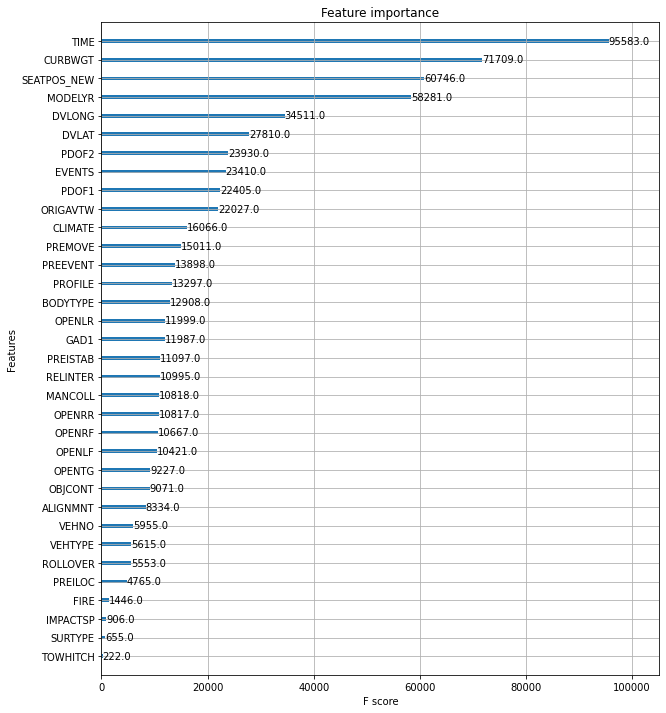

In [19]:
# Feature importance 출력
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.305779 to fit


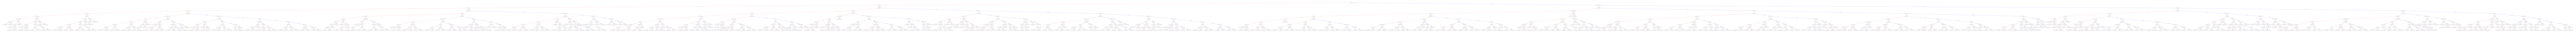

In [51]:
plot_tree(xgb_model, 
            num_trees = 0,
            rank_dir = 'LR'
            # fontsize=12
            )
# plt.show()
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('xgb.pdf', dpi=300, quality=80, optimize=True, progressive=True)  